# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
#    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
 #   if city not in cities:
  #      cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
#print(cities)

# let's make a smaller list
lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(cities)
print(len(cities))

['sentyabrskiy', 'sunnyside', 'bredasdorp', 'georgetown', 'college', 'buribay', 'constanta', 'vestmannaeyjar', 'conceicao do araguaia', 'marsh harbour', 'rikitea', 'illoqqortoormiut', 'kodiak', 'viedma', 'puerto ayora', 'ust-kamchatsk', 'pyapon', 'whitehorse', 'qaanaaq', 'clyde river', 'abha', 'shache', 'hithadhoo', 'esperance', 'hearst', 'nkhata bay', 'taolanaro', 'tulsipur', 'cape town', 'jamestown', 'ushuaia', 'tidore', 'torbay', 'port elizabeth', 'doctor pedro p. pena', 'kapaa', 'arraial do cabo', 'balti', 'busselton', 'bilma', 'mataura', 'punta arenas', 'la libertad', 'mehamn', 'luderitz', 'belyy yar', 'upernavik', 'dingle', 'albany', 'ribeira grande', 'new norfolk', 'cidreira', 'hasaki', 'bluff', 'east london', 'vostok', 'vanimo', 'nobres', 'iskateley', 'saleaula', 'avarua', 'halifax', 'nortelandia', 'mahebourg', 'bay city', 'rio grande', 'ayan', 'pioner', 'souillac', 'jacareacanga', 'faanui', 'vao', 'saint george', 'roma', 'pisco', 'chokurdakh', 'bathsheba', 'lebu', 'tura', 'anc

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

testcity = []
lat = []
lng = []
mtemp = []
hum = []
cldy = []
wspd = []
ctry = []
date = []



units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


response_json = []

for x in range(len(cities)):
    if (x+1) % 50 ==0:
        time.sleep(60)
    print(f"Making request number: {x} for ID: {cities[x]}")
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

    # Get one of the posts
    post_response = requests.get(query_url + cities[x])

    # Save post's JSON
    response_json.append(post_response.json())


    #response = requests.get(target_url).json()
    #print(response)
    #xx = input("this is response")
    #try:
    #    testcity.append(post_response['name'])
    #    lat.append(post_response['coord']['lat'])
    #    lng.append(post_response['coord']['lon'])
    #    mtemp.append(post_response['main']["temp_max"])
    #    hum.append(post_response['main']["humidity"])
    #    cldy.append(post_response["clouds"]["all"])                             
    #    wspd.append(post_response["wind"]["speed"])                             
    #    ctry.append(post_response["sys"]["country"])                             
    #    date.append(post_response["dt"])
    #    #newdate = pd.to_datetime(response["dt"],unit = 's')
    #    #date.append(newdate)                         
    #except(KeyError):
    #    print("not found")
    
    
    
    

    
    
    
    
    
    
    
    
#query_url = url + "appid=" + api_key + "&q=" + city
#weather_json{"main"}["temp"]    
    
    
    

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city
#weather_json[]"main"]["temp"]


#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")
#print(response_json)
#print(json.dumps(response_json, indent=4, sort_keys=True))

Making request number: 0 for ID: caravelas
Making request number: 1 for ID: mataura
Making request number: 2 for ID: rock sound
Making request number: 3 for ID: port alfred
Making request number: 4 for ID: busselton
Making request number: 5 for ID: albany
Making request number: 6 for ID: labuhan
Making request number: 7 for ID: lorut
Making request number: 8 for ID: hilo
Making request number: 9 for ID: lorengau
Making request number: 10 for ID: peterhead
Making request number: 11 for ID: opotiki
Making request number: 12 for ID: ushuaia
Making request number: 13 for ID: vaini
Making request number: 14 for ID: atuona
Making request number: 15 for ID: tasiilaq
Making request number: 16 for ID: puerto ayora
Making request number: 17 for ID: aklavik
Making request number: 18 for ID: mar del plata
Making request number: 19 for ID: talnakh
Making request number: 20 for ID: benghazi
Making request number: 21 for ID: new norfolk
Making request number: 22 for ID: chuy
Making request number: 23

KeyboardInterrupt: 

In [6]:
print(response_json)
print(json.dumps(response_json, indent=4, sort_keys=True))

[{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.34, 'feels_like': 44.91, 'temp_min': 50, 'temp_max': 51.01, 'pressure': 1016, 'humidity': 97}, 'visibility': 10000, 'wind': {'speed': 9.57, 'deg': 148}, 'clouds': {'all': 1}, 'dt': 1603146495, 'sys': {'type': 3, 'id': 2020551, 'country': 'AU', 'sunrise': 1603143071, 'sunset': 1603190125}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}, {'coord': {'lon': 136.67, 'lat': 51.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.34, 'feels_like': 23.02, 'temp_min': 29.34, 'temp_max': 29.34, 'pressure': 1022, 'humidity': 79, 'sea_level': 1022, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 175}, 'clouds': {'all': 0}, 'dt': 1603146877, 'sys': {'country': 'RU', 'sunrise': 1603142701, 'sunset': 1603180253}, 'tim

## Convert Raw Data to DataFrame
* Save as csv

In [43]:
#do not use

cities = ["Paris", "London", "Oslo", "Beijing"]

from api_keys import weather_api_key

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")


The latitude information received is: [48.85, 51.51, 59.91, 39.91]
The temperature information received is: [284.42, 284.68, 280.55, 287.28]


In [4]:
testcities = ["london","hoboken","paris","lima","cairo","manaus",'ngorongoro', 'ushuaia',
             'provideniya', 'tiksi', 'georgiyevka', 'saskylakh',
             'mayo', "quito","osasco", "trujillo",
             'yellowknife', 'isangel', 'ayan', 'jawhar', 'whitehorse',
              'mar del plata', 'nelson bay', 'alice springs','goo city blah']
              #, 'sentyabrskiy']
              #, 'isangel']
              #'ayan']
              #'jawhar' ]
              #'whitehorse'
             #]

units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?"


from api_keys import weather_api_key

testcity = []
lat = []
lng = []
mtemp = []
hum = []
cldy = []
wspd = []
ctry = []
date = []
i = 0





#for x in range(len(cities)):
#    if (x+1) % 50 ==0:
#        time.sleep(60)
#    print(f"Making request number: {x} for ID: {cities[x]}")
#    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="


# Get one of the posts
#   post_response = requests.get(query_url + cities[x])

   # Save post's JSON
#response_json.append(post_response.json())



# loop through tv show titles, make requests and parse
for city in cities:
    if (i+1) % 50 == 0:
        time.sleep(60)
    print(f"Making request number: {i} for ID: {cities[i]}")
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="
    target_url = query_url + city
    #print(target_url)
    #xx = input("this is target url")
    response = requests.get(target_url).json()
    #print(response)
    #xx = input("this is response")
    try:
        testcity.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        mtemp.append(response['main']["temp_max"])
        hum.append(response['main']["humidity"])
        cldy.append(response["clouds"]["all"])                             
        wspd.append(response["wind"]["speed"])                             
        ctry.append(response["sys"]["country"])                             
        date.append(response["dt"])
        #newdate = pd.to_datetime(response["dt"],unit = 's')
        #date.append(newdate)                         
    except(KeyError):
        print("not found")
    i = i+1       
            
    #ratings.append(response[0]['show']['rating']['average'])
print(testcity)
print(lat)
print(lng)
print(mtemp)
print(hum)
print(wspd)
print(date)


# create a data frame from cities, lat, and temp
weather_dict = {
    "city": testcity,
    "lat": lat,
    "lng": lng,
    "max_temp": mtemp,
    "humidity": hum,
    "cloudiness": cldy,
    "wind_speed": wspd,
    "country": ctry,
    "date": date
        
}
weather_data = pd.DataFrame(weather_dict)


weather_data.head(25)


Making request number: 0 for ID: sentyabrskiy
not found
Making request number: 1 for ID: sunnyside
Making request number: 2 for ID: bredasdorp
Making request number: 3 for ID: georgetown
Making request number: 4 for ID: college
Making request number: 5 for ID: buribay
Making request number: 6 for ID: constanta
Making request number: 7 for ID: vestmannaeyjar
Making request number: 8 for ID: conceicao do araguaia
Making request number: 9 for ID: marsh harbour
Making request number: 10 for ID: rikitea
Making request number: 11 for ID: illoqqortoormiut
not found
Making request number: 12 for ID: kodiak
Making request number: 13 for ID: viedma
Making request number: 14 for ID: puerto ayora
Making request number: 15 for ID: ust-kamchatsk
not found
Making request number: 16 for ID: pyapon
Making request number: 17 for ID: whitehorse
Making request number: 18 for ID: qaanaaq
Making request number: 19 for ID: clyde river
Making request number: 20 for ID: abha
Making request number: 21 for ID: s

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Sunnyside,46.32,-120.01,62.01,62,1,6.17,US,1603161277
1,Bredasdorp,-34.53,20.04,57.20,71,51,12.75,ZA,1603161524
2,George Town,5.41,100.34,84.20,79,20,1.12,MY,1603161524
3,College,64.86,-147.80,21.99,85,90,1.57,US,1603161524
4,Buribay,51.96,58.16,47.16,50,86,7.81,RU,1603161524
5,Constanța,44.18,28.65,46.40,70,70,6.93,RO,1603161524
6,Vestmannaeyjar,63.44,-20.27,39.38,77,72,3.38,IS,1603161524
7,Conceição do Araguaia,-8.26,-49.26,80.82,47,100,0.85,BR,1603161524
8,Marsh Harbour,26.54,-77.06,81.30,76,100,19.33,BS,1603161524
9,Rikitea,-23.12,-134.97,74.30,77,0,10.58,PF,1603161524


In [8]:
weather_data.head(40)

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Sunnyside,46.32,-120.01,62.01,62,1,6.17,US,1603161277
1,Bredasdorp,-34.53,20.04,57.20,71,51,12.75,ZA,1603161524
2,George Town,5.41,100.34,84.20,79,20,1.12,MY,1603161524
3,College,64.86,-147.80,21.99,85,90,1.57,US,1603161524
4,Buribay,51.96,58.16,47.16,50,86,7.81,RU,1603161524
5,Constanța,44.18,28.65,46.40,70,70,6.93,RO,1603161524
6,Vestmannaeyjar,63.44,-20.27,39.38,77,72,3.38,IS,1603161524
7,Conceição do Araguaia,-8.26,-49.26,80.82,47,100,0.85,BR,1603161524
8,Marsh Harbour,26.54,-77.06,81.30,76,100,19.33,BS,1603161524
9,Rikitea,-23.12,-134.97,74.30,77,0,10.58,PF,1603161524


In [9]:
# Build a scatter plot for each data type
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
#plt.title("Temperature in World Cities")
#plt.ylabel("Temperature (Celsius)")
#plt.xlabel("Latitude")
#plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
#plt.show()



#ts = timestamp.date(1602869213)
#print(ts)

#ts = 1602869213
#timestamp



#weather_data['date'] = weather_data['date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y'))

#import datetime
#timestamp = datetime.datetime.fromtimestamp(1500000000)
#print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))




#weather_data['date_up'] = weather_data['date'].dt.mormalize


#df['mydates'].dt.date

#weather_data.head()

from datetime import datetime as dt
import datetime
#timestamp = datetime.datetime.fromtimestamp(iloc.weather_data['date':0])
chartdate = []

s = weather_data["date"]

#s[2]
print(chartdate)
timestamp = datetime.datetime.fromtimestamp(s[0])
chartdate = (timestamp.strftime('%m-%d-%Y'))
print(chartdate)
xx = input("date befor zero out")

chartdate

[]
10-19-2020
date befor zero outx


'10-19-2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

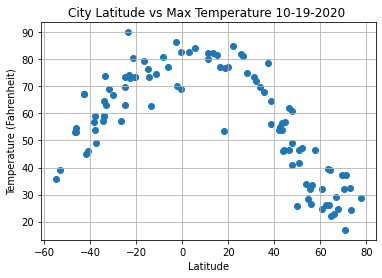

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {chartdate} ")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


### Latitude vs. Humidity Plot

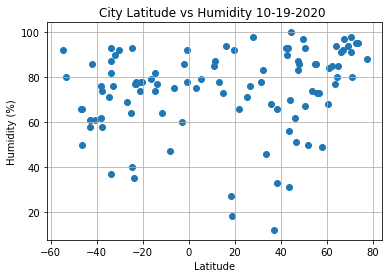

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {chartdate} ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cl vs h.png")

# Show plot
plt.show()


### Latitude vs. Cloudiness Plot

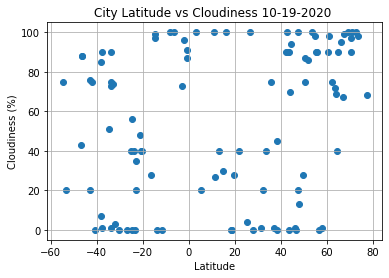

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {chartdate} ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cl vs cloud.png")

# Show plot
plt.show()


### Latitude vs. Wind Speed Plot

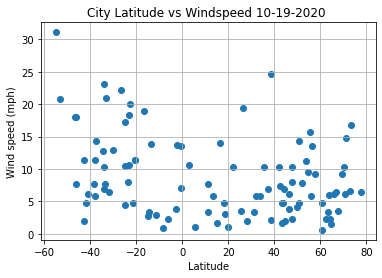

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Windspeed {chartdate} ")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cl vs wind.png")

# Show plot
plt.show()


## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correl coeff
#correl = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
#print(f"The correlation coefficient of mouse weight & average tumor volume is {correl}")

#x values
x_values = x
y_values = y

#calculate scatter & linear regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

#label
plt.title("Average tumor volume vs mouse weight for Capomulin")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


In [14]:
# create the north & south hemisphere dataframes

#n_weather_data = pd.weather_data["lat">=0]


#create Capomulin only dataframe
n_weather_data = weather_data.loc[weather_data["lat"] >= 0]

s_weather_data = weather_data.loc[weather_data["lat"] < 0]



#create Capomulin only dataframe
#cap_all = drop_df.loc[drop_df["Drug Regimen"] == "Capomulin"]

print(n_weather_data)

print(s_weather_data)


                  city    lat     lng  max_temp  humidity  cloudiness  \
0            Sunnyside  46.32 -120.01     62.01        62           1   
2          George Town   5.41  100.34     84.20        79          20   
3              College  64.86 -147.80     21.99        85          90   
4              Buribay  51.96   58.16     47.16        50          86   
5            Constanța  44.18   28.65     46.40        70          70   
6       Vestmannaeyjar  63.44  -20.27     39.38        77          72   
8        Marsh Harbour  26.54  -77.06     81.30        76         100   
10   Saint Paul Harbor  57.79 -152.41     46.40        49           1   
13              Pyapon  16.28   95.68     77.14        94         100   
14          Whitehorse  60.72 -135.05     24.80        68          90   
15             Qaanaaq  77.48  -69.36     28.58        88          68   
16         Clyde River  70.47  -68.59     32.00        91          90   
17                Abhā  18.22   42.51     53.60    

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

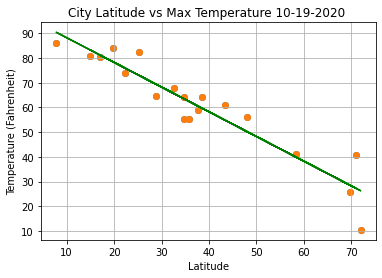

In [39]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {chartdate} ")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["max_temp"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(30,5),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("TemperatureInWorldCities - N.png")

# Show plot
plt.show()



#(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
#plt.scatter(x_values,y_values)

#label
#plt.title("Average tumor volume vs mouse weight for Capomulin")
#plt.xlabel("Weight in grams")
#plt.ylabel("Average Tumor Volume (mm3)")

#plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

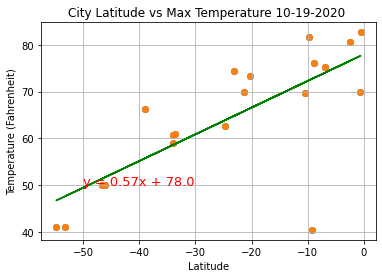

In [40]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {chartdate} ")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["max_temp"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,50),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("TemperatureInWorldCities - S.png")

# Show plot
plt.show()


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

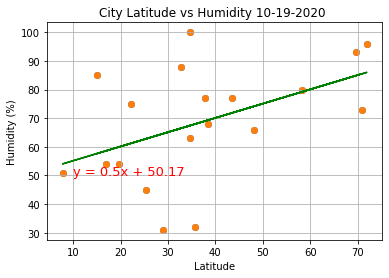

In [41]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {chartdate} ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["humidity"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,50),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("cl vs h - N.png")


# Show plot
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

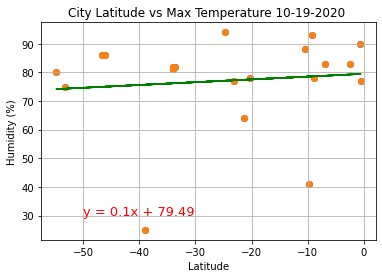

In [42]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {chartdate} ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["humidity"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,30),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("cl vs h - S.png")

# Show plot
plt.show()


###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

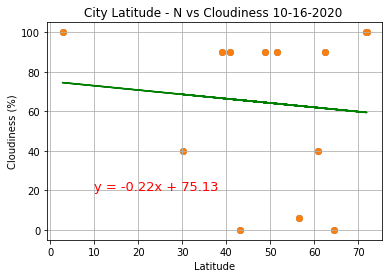

In [95]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude - N vs Cloudiness {chartdate} ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["cloudiness"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,20),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("cl vs cloud - N.png")


# Show plot
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

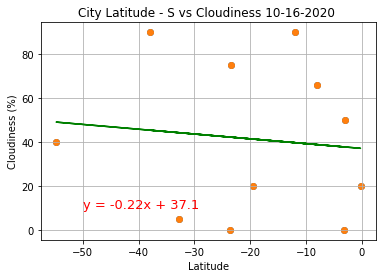

In [96]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude - S vs Cloudiness {chartdate} ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["cloudiness"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,10),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("cl vs cloud - S.png")

# Show plot
plt.show()


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

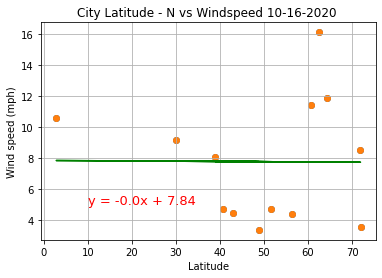

In [98]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude - N vs Windspeed {chartdate} ")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["wind_speed"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,5),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("cl vs wind - N.png")


# Show plot
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

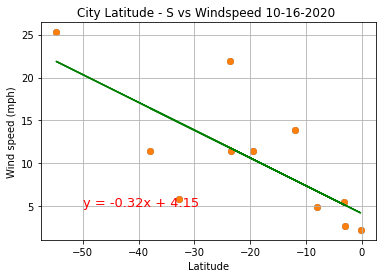

In [99]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {chartdate} ")
plt.title(f"City Latitude - S vs Windspeed {chartdate} ")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["wind_speed"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,5),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("cl vs wind - S.png")

# Show plot
plt.show()


In [15]:
#create .csv file
weather_data.to_csv(r'..\weatherpy-outfile.csv', index = False)